1.1 수학과 파이썬 복습

In [15]:
import numpy as np

x = np.array([1,2,3])
print(x.__class__)
print(x.shape)
print(x.ndim)

<class 'numpy.ndarray'>
(3,)
1


In [16]:
W = np.array([[1,2,3], [4,5,6]])
print(W.shape)
print(W.ndim)

(2, 3)
2


In [17]:
W = np.array([[1,2,3], [4,5,6]])
X = np.array([[0,1,2], [3,4,5]])
W + X

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [18]:
W * X

array([[ 0,  2,  6],
       [12, 20, 30]])

In [19]:
A = np.array([[1,2], [3,4]])
A * 10

array([[10, 20],
       [30, 40]])

In [20]:
b = np.array([10,20])
A * b

array([[10, 40],
       [30, 80]])

In [21]:
a = np.array([1,2,3])
b = np.array([4,5,6])
np.dot(a,b)

32

In [22]:
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])
np.matmul(A,B)

array([[19, 22],
       [43, 50]])

1.2 신경망 추론

In [23]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [24]:
a = sigmoid(h)

In [25]:
import numpy as np

W1 = np.random.randn(2,4)
b1 = np.random.randn(4)
W2 = np.random.randn(4,3)
b2 = np.random.randn(3)
x = np.random.randn(10,2)
h = np.matmul(x, W1) + b1
s = np.matmul(a, W2) + b2

In [12]:
class Sigmoid:
    def __init__(self):
        self.params = []
        
    def forward(self, x):
        return 1 / (1 + np.exp(-x))

In [11]:
class Affine:
    def __init__(self,W,b):
        self.params = [W,b]
        
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x,W) + b
        return out

In [30]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        W1 = np.random.randn(I,H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H,O)
        b2 = np.random.randn(O)
        
        self.layers = [
            Affine(W1,b1),
            Sigmoid(),
            Affine(W2,b2)
        ]
        
        self.params = []
        for layer in self.layers:
            self.params += layer.params
    
    def predict(self,x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [31]:
x = np.random.randn(10,2)
model = TwoLayerNet(2,4,3)
s = model.predict(x)

1.3.1 손실 함수

MatMul 노드

In [33]:
class Matmul:
    def __init__(self,W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = x
        return out
    
    def forward(self, x):
        W, = self.params
        out = np.dot(x,W)
        self.x = x
        return out
    
    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout,W.T)
        dW = np.dot(self.x.T,dout)
        self.grads[0][...] = dW
        return dx

Affine 계층

In [17]:
class Affine:
    def __init__(self,W,b):
        self.params = [W,b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None
        
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x,W) + b
        self.x = x
        return out
    
    def backward(self, dout):
        W, b = self.params
        dx = np.dot(dout,W.T)
        dW = np.dot(self.x.T,dout)
        db = np.sum(dout, axis=0)
        
        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

Softmax with Loss 계층

In [18]:
class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None
        self.t = None
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)
        loss = cross_entropy_error(self.y, self.t)
        return loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size
        return dx

Sigmoid 계층

In [19]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None
        
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

In [20]:
class SigmoidWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.loss = None
        self.y = None
        self.t = None
        
    def forward(self, x, t):
        self.t = t
        self.y =  1 / (1 + np.exp(-x))
        self.loss = cross_entropy_error(np.c_[1 - self.y, self.y], self.t)
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) * dout / batch_size
        return dx

In [21]:
class Dropout:
    def __init__(self, dropout_ratio = 0.5):
        self.params, self.grads = [], []
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg = True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
    
    def backward(self, dout):
        return dout * self.mask

In [22]:
class Embedding:
    def __init__(self,W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.idx = None
    
    def forward(self, x):
        W, = self.params
        self.idx = idx
        out = W[idx]
        return out
    
    def backward(self, dout):
        dW = self.grads
        dW[...] = 0
        np.add.at(dW, self.idx, dout)
        return None

Repeat 노드

In [5]:
import numpy as np
D,N = 8,7
x = np.random.randn(1,D)
y = np.repeat(x,N,axis=0)
dy = np.random.randn(N,D)
dx = np.sum(dy, axis=0, keepdims=True)

Sum 노드

In [7]:
D,N = 8,7
x = np.random.randn(N,D)
y = np.sum(x,axis=0, keepdims=True)
dy = np.random.randn(1,D)
dx = np.repeat(dy, N, axis=0)

1.3.6 가중치 갱신

In [32]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr #= learning rate
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

In [2]:
class Momentum:
    def __init__(self, lr=0.01, momemtum=0.9):
        self.lr = lr #= learning rate
        self.momemtum = momemtum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = []
            for params in params:
                self.v.append(np.zeros_like(param))
                
        for i in range(len(params)):
            self.v[i] = self.momemtum * self.v[i] - self.lr * grads[i]
            params[i] += self.v[i] 

In [3]:
class Nesterov:
    def __init__(self, lr=0.01, momemtum=0.9):
        self.lr = lr #= learning rate
        self.momemtum = momemtum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = []
            for params in params:
                self.v.append(np.zeros_like(param))
                
        for i in range(len(params)):
            self.v[i] *= self.momemtum 
            self.v[i] -= self.lr * grads[i]
            params[i] += self.momemtum * self.momemtum * self.v[i]
            params[i] += (1 + self.momemtum) * self.lr * grads[i]

In [4]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr #= learning rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = []
            for params in params:
                self.h.append(np.zeros_like(param))
                
        for i in range(len(params)):
            self.h[i] += grads[i] * grads[i]
            params[i] -= self.lr * grads[i] / (np.sqrt(self.h[i]) + 1e-7)

In [5]:
class RMSprop:
    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr #= learning rate
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = []
            for params in params:
                self.h.append(np.zeros_like(param))
                
        for i in range(len(params)):
            self.h[i] *= self.decay_rate
            self.h[i] += (1 - self.decay_rate) * grads[i] * grads[i]
            params[i] -= self.lr * grads[i] / (np.sqrt(self.h[i]) + 1e-7)

In [6]:
class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr #= learning rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = [], []
            for params in params:
                self.m.append(np.zeros_like(param))
                self.v.append(np.zeros_like(param))
        self.iter += 1
        lr_t = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)
                
        for i in range(len(params)):
            self.m[i] += (1 - self.beta1) * (grads[i] - self.m[i])
            self.v[i] += (1 - self.beta2) * (grads[i]**2 - self.v[i])
            params[i] -= lr_t * self.m[i] / (np.sqrt(self.v[i]) + 1e-7)

In [6]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import spiral

x,t = spiral.load_data()
print('x',x.shape)
print('t',t.shape)

x (300, 2)
t (300, 3)


In [28]:
def softmax(x):
    if x.ndim == 2:       
        x = x - x.max(axis=1, keepdims=True)
        x = np.exp(x)
        x /= x.sum(axis=1, keepdims=True)
        
    elif x.ndim == 1:
        x = x - x.max(x)
        x = np.exp(x) / np.sum(np.exp(x))
    
    return x

In [30]:
def cross_entropy_error(y,t):
    if y.ndim == 1:       
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    if t.size == y.size:
        t = t.argmax(axis=1)
    
    batch_size = y.shape[0]
    
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

1.4.2 신경망 구현

In [26]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        W1 = 0.01 * np.random.randn(I,H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H,O)
        b2 = np.zeros(O)
        
        self.layers = [
            Affine(W1,b1),
            Sigmoid(),
            Affine(W2,b2)
        ]
        self.loss_layer = SoftmaxWithLoss()
        
        self.params, self.grads = [], []
        
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
            
    def predict(self,x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

In [34]:
import numpy as np

optimizer = SGD(lr = learning_rate)
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x,t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)

data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters * batch_size:(iters+1)*batch_size]
        batch_t = t[iters * batch_size:(iters+1)*batch_size]
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1
        
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| 에폭 %d | 반복 %d / %d | 손실 %.2f' % (epoch+1, iters+1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

| 에폭 1 | 반복 10 / 10 | 손실 1.13
| 에폭 2 | 반복 10 / 10 | 손실 1.13
| 에폭 3 | 반복 10 / 10 | 손실 1.12
| 에폭 4 | 반복 10 / 10 | 손실 1.12
| 에폭 5 | 반복 10 / 10 | 손실 1.11
| 에폭 6 | 반복 10 / 10 | 손실 1.14
| 에폭 7 | 반복 10 / 10 | 손실 1.16
| 에폭 8 | 반복 10 / 10 | 손실 1.11
| 에폭 9 | 반복 10 / 10 | 손실 1.12
| 에폭 10 | 반복 10 / 10 | 손실 1.13
| 에폭 11 | 반복 10 / 10 | 손실 1.12
| 에폭 12 | 반복 10 / 10 | 손실 1.11
| 에폭 13 | 반복 10 / 10 | 손실 1.09
| 에폭 14 | 반복 10 / 10 | 손실 1.08
| 에폭 15 | 반복 10 / 10 | 손실 1.04
| 에폭 16 | 반복 10 / 10 | 손실 1.03
| 에폭 17 | 반복 10 / 10 | 손실 0.96
| 에폭 18 | 반복 10 / 10 | 손실 0.92
| 에폭 19 | 반복 10 / 10 | 손실 0.92
| 에폭 20 | 반복 10 / 10 | 손실 0.87
| 에폭 21 | 반복 10 / 10 | 손실 0.85
| 에폭 22 | 반복 10 / 10 | 손실 0.82
| 에폭 23 | 반복 10 / 10 | 손실 0.79
| 에폭 24 | 반복 10 / 10 | 손실 0.78
| 에폭 25 | 반복 10 / 10 | 손실 0.82
| 에폭 26 | 반복 10 / 10 | 손실 0.78
| 에폭 27 | 반복 10 / 10 | 손실 0.76
| 에폭 28 | 반복 10 / 10 | 손실 0.76
| 에폭 29 | 반복 10 / 10 | 손실 0.78
| 에폭 30 | 반복 10 / 10 | 손실 0.75
| 에폭 31 | 반복 10 / 10 | 손실 0.78
| 에폭 32 | 반복 10 / 10 | 손실 0.77
| 에폭 33 | 반복 10 /

| 에폭 270 | 반복 10 / 10 | 손실 0.12
| 에폭 271 | 반복 10 / 10 | 손실 0.12
| 에폭 272 | 반복 10 / 10 | 손실 0.12
| 에폭 273 | 반복 10 / 10 | 손실 0.12
| 에폭 274 | 반복 10 / 10 | 손실 0.12
| 에폭 275 | 반복 10 / 10 | 손실 0.11
| 에폭 276 | 반복 10 / 10 | 손실 0.12
| 에폭 277 | 반복 10 / 10 | 손실 0.12
| 에폭 278 | 반복 10 / 10 | 손실 0.11
| 에폭 279 | 반복 10 / 10 | 손실 0.11
| 에폭 280 | 반복 10 / 10 | 손실 0.11
| 에폭 281 | 반복 10 / 10 | 손실 0.11
| 에폭 282 | 반복 10 / 10 | 손실 0.12
| 에폭 283 | 반복 10 / 10 | 손실 0.11
| 에폭 284 | 반복 10 / 10 | 손실 0.11
| 에폭 285 | 반복 10 / 10 | 손실 0.11
| 에폭 286 | 반복 10 / 10 | 손실 0.11
| 에폭 287 | 반복 10 / 10 | 손실 0.11
| 에폭 288 | 반복 10 / 10 | 손실 0.12
| 에폭 289 | 반복 10 / 10 | 손실 0.11
| 에폭 290 | 반복 10 / 10 | 손실 0.11
| 에폭 291 | 반복 10 / 10 | 손실 0.11
| 에폭 292 | 반복 10 / 10 | 손실 0.11
| 에폭 293 | 반복 10 / 10 | 손실 0.11
| 에폭 294 | 반복 10 / 10 | 손실 0.11
| 에폭 295 | 반복 10 / 10 | 손실 0.12
| 에폭 296 | 반복 10 / 10 | 손실 0.11
| 에폭 297 | 반복 10 / 10 | 손실 0.12
| 에폭 298 | 반복 10 / 10 | 손실 0.11
| 에폭 299 | 반복 10 / 10 | 손실 0.11
| 에폭 300 | 반복 10 / 10 | 손실 0.11


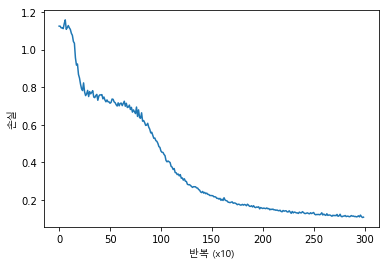

In [40]:
import matplotlib.font_manager as fm
malgun = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf')

plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('반복 (x10)', fontproperties= malgun)
plt.ylabel('손실', fontproperties= malgun)
plt.show()

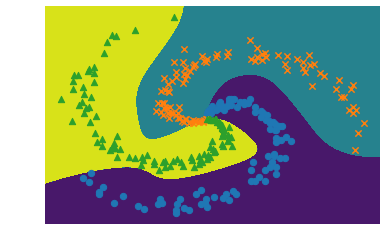

In [43]:
h = 0.001
x_min, x_max = x[:,0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:,1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o','x','^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N,0], x[i*N:(i+1)*N, 1], s= 40, marker=markers[i])
plt.show()